In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#set seaborn graphics
sns.set()

In [3]:
pathdata = os.getcwd()+'/Data'
os.chdir(pathdata)
ecb_gdp = pd.read_excel('ecb_proj.xlsx', sheet_name='GDP')

In [3]:
ecb_gdp.columns

Index(['Unnamed: 0', 'Forecaster', 'CurrY', '1Y', '2Y'], dtype='object')

In [4]:
ecb_gdp.index = pd.to_datetime(ecb_gdp['Unnamed: 0'])
ecb_gdp = ecb_gdp.sort_index()
ecb_gdp = ecb_gdp.drop(['Unnamed: 0'], axis=1)

In [6]:
df_gdp = pd.read_pickle('gdp_data.pkl')
cols = ['Current Year','One Year Ahead', 'Longer Term']
for col in cols:
    df_gdp[cols] = df_gdp[cols].astype(float)
gdpmeans = df_gdp.groupby('SurveyDate')[['Current Year','One Year Ahead', 'Longer Term']].mean()
gdpmeans

,Current Year,One Year Ahead,Longer Term
SurveyDate,,,
1999-02-12,2.051385,2.414531,2.464167
1999-05-03,1.954918,2.449344,NaN
1999-08-06,1.939811,2.595472,NaN
1999-11-03,1.992807,2.784912,NaN
2000-02-09,3.060508,2.939655,2.521364
...,...,...,...
2019-01-11,1.527380,1.495568,1.486521
2019-03-22,1.196350,1.389653,1.443698
2019-07-05,1.180278,1.285566,1.377194


In [7]:
ecb_gdp_diff = ecb_gdp.copy()
ecb_gdp_diff = ecb_gdp_diff.drop('Forecaster', axis=1)
ecb_gdp_diff = ecb_gdp_diff.astype(float)
ecb_gdp_diff = ecb_gdp_diff.diff()
ecb_gdp_diff.to_csv('ecb_diff.csv') 

In [8]:
dates_list = ecb_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdf = gdpmeans.loc[(gdpmeans.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfwork = gdpmeans.loc[(gdpmeans.index>dates_list[i])&(gdpmeans.index<dates_list[i+1])].tail(1)
    #print(newdfwork)
    newdf = newdf.append(newdfwork)

In [9]:
newdf.index = ecb_gdp.index

In [10]:
newdf

,Current Year,One Year Ahead,Longer Term
Unnamed: 0,,,
2001-03-01,2.725082,2.769655,2.702222
2001-06-01,2.490000,2.644000,2.671111
2001-09-01,2.042000,2.379592,2.608088
2001-12-01,1.534259,1.544444,2.542105
2002-03-01,1.334833,2.550026,2.533721
...,...,...,...
2018-12-01,2.039604,1.802047,1.554319
2019-03-01,1.527380,1.495568,1.486521
2019-06-01,1.196350,1.389653,1.443698


In [11]:
gdpmeans1 = pd.concat([newdf, ecb_gdp], axis=1)
gdpmeans1.columns

Index(['Current Year', 'One Year Ahead', 'Longer Term', 'Forecaster', 'CurrY',
       '1Y', '2Y'],
      dtype='object')

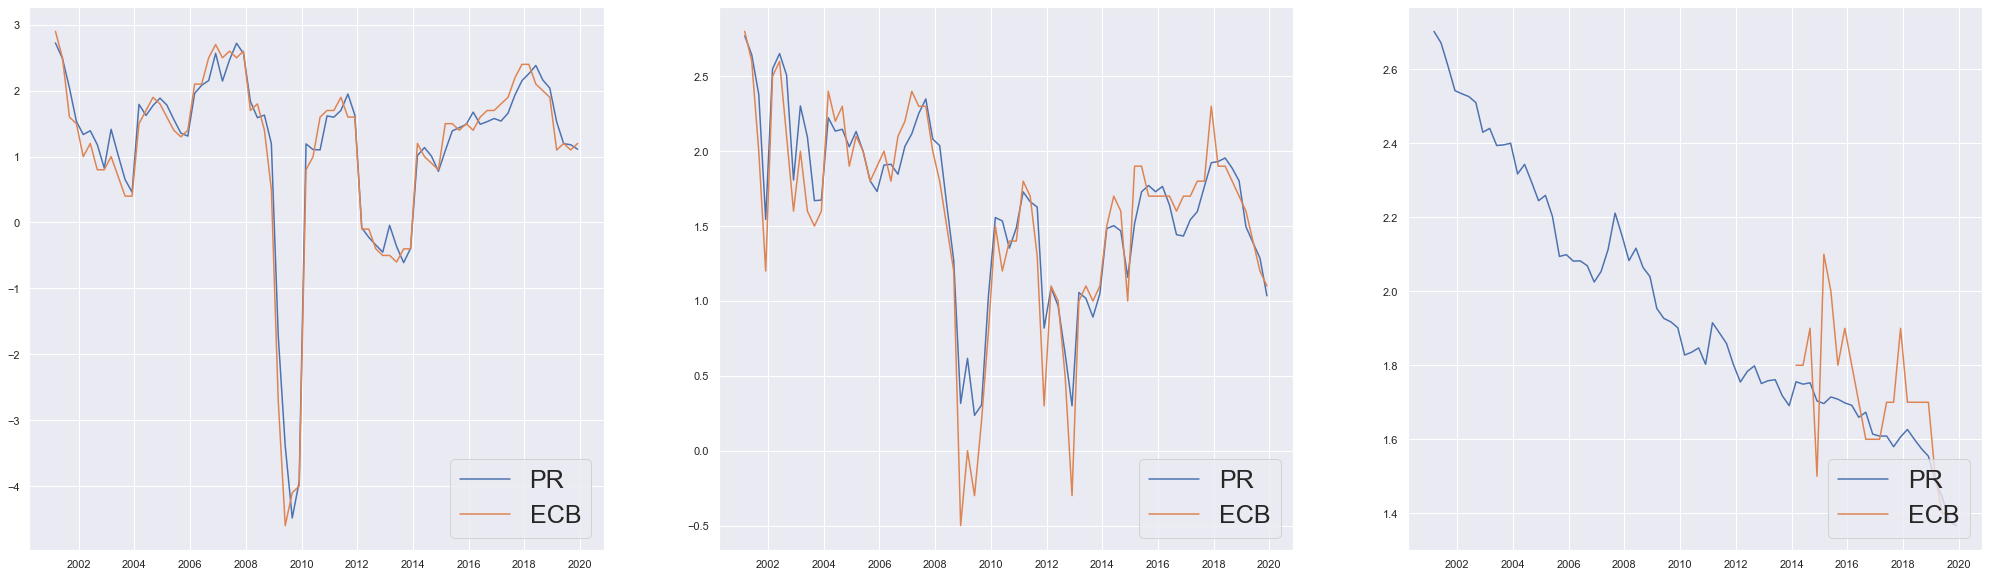

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(35, 10))
axs[0].plot(gdpmeans1[['Current Year', 'CurrY']])
axs[0].legend(['PR', 'ECB'], ncol=1, loc='lower right', fontsize=25)
axs[1].plot(gdpmeans1[['One Year Ahead', '1Y']])
axs[1].legend(['PR', 'ECB'], ncol=1, loc='lower right', fontsize=25)
axs[2].plot(gdpmeans1[['Longer Term', '2Y']])
axs[2].legend(['PR', 'ECB'], ncol=1, loc='lower right', fontsize=25);

In [14]:
proj_diff = pd.DataFrame()
proj_diff['CY'] = gdpmeans1['Current Year']-gdpmeans1['CurrY']
proj_diff['1Y'] = gdpmeans1['One Year Ahead']-gdpmeans1['1Y']
proj_diff['2Y'] = gdpmeans1['Longer Term']-gdpmeans1['2Y']

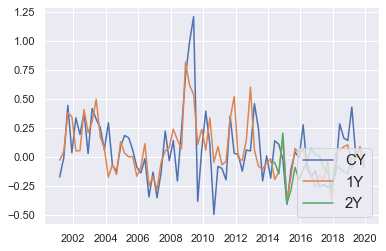

In [15]:
plt.plot(proj_diff)
plt.legend(list(proj_diff), ncol=1, loc='lower right', fontsize=15)

In [17]:
proj_diff.to_pickle('ecbdiffgdp.pkl')

In [18]:
ecb_h = pd.read_excel('ecb_proj.xlsx', sheet_name='HICP')
ecb_h.index = pd.to_datetime(ecb_h['Unnamed: 0'])
ecb_h = ecb_h.sort_index()
df_h = pd.read_pickle('infl_data.pkl')
cols = ['Current Year','One Year Ahead', 'Longer Term']
for col in cols:
    df_h[cols] = df_h[cols].astype(float)
hmeans = df_h.groupby('SurveyDate')[['Current Year','One Year Ahead', 'Longer Term']].mean()
dates_list = ecb_h.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdf = hmeans.loc[(hmeans.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfwork = hmeans.loc[(hmeans.index>dates_list[i])&(hmeans.index<dates_list[i+1])].tail(1)
    #print(newdfwork)
    newdf = newdf.append(newdfwork)
newdf.index = ecb_h.index
hmeans1 = pd.concat([newdf, ecb_h], axis=1)

In [19]:
ecb_h = pd.read_excel('ecb_proj.xlsx', sheet_name='HICP')
ecb_h.index = pd.to_datetime(ecb_h['Unnamed: 0'])
ecb_h = ecb_h.drop('Unnamed: 0', axis=1)
ecb_h_diff = ecb_h.copy()
ecb_h_diff = ecb_h_diff.drop('Forecaster', axis=1)
ecb_h_diff = ecb_h_diff.astype(float)
ecb_h_diff = ecb_h_diff.diff()
ecb_h_diff.to_csv('ecbh_diff.csv') 


In [20]:
ecb_h_diff

,CurrY,1Y,2Y
Unnamed: 0,,,
2019-12-01,NaN,NaN,NaN
2019-09-01,0.0,-0.1,0.1
2019-06-01,0.1,0.4,0.1
2019-03-01,-0.1,0.1,0.0
2018-12-01,0.6,0.1,0.1
...,...,...,...
2002-03-01,-0.5,-0.3,NaN
2001-12-01,0.9,0.0,NaN
2001-09-01,0.0,0.2,NaN


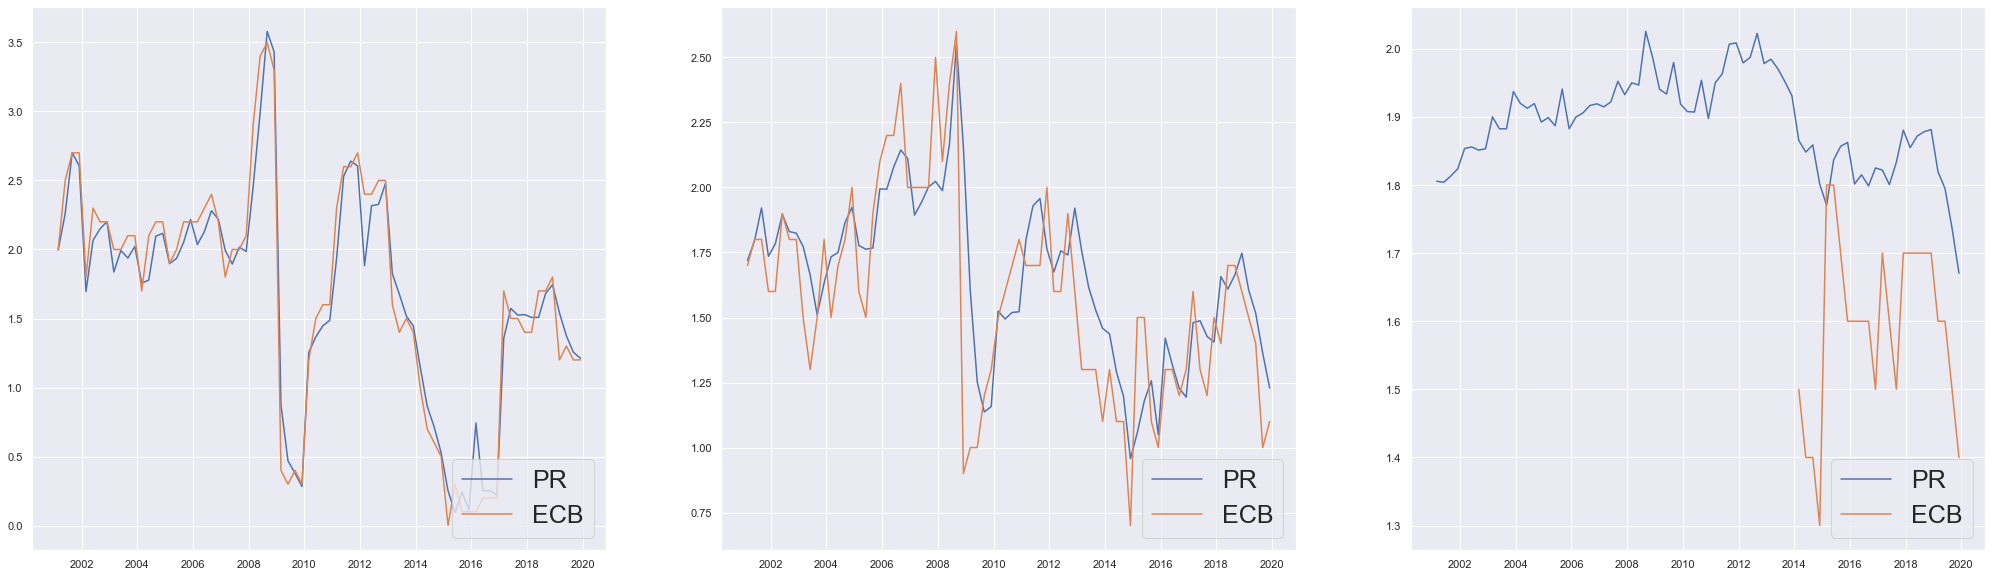

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(35, 10))
axs[0].plot(hmeans1[['Current Year', 'CurrY']])
axs[0].legend(['PR', 'ECB'], ncol=1, loc='lower right', fontsize=25)
axs[1].plot(hmeans1[['One Year Ahead', '1Y']])
axs[1].legend(['PR', 'ECB'], ncol=1, loc='lower right', fontsize=25)
axs[2].plot(hmeans1[['Longer Term', '2Y']])
axs[2].legend(['PR', 'ECB'], ncol=1, loc='lower right', fontsize=25);

In [23]:
proj_diff = pd.DataFrame()
proj_diff['CY'] = hmeans1['Current Year']-hmeans1['CurrY']
proj_diff['1Y'] = hmeans1['One Year Ahead']-hmeans1['1Y']
proj_diff['2Y'] = hmeans1['Longer Term']-hmeans1['2Y']

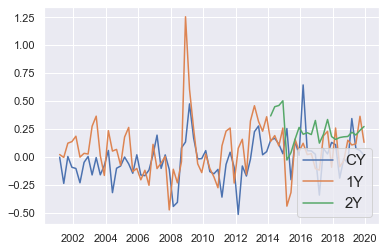

In [24]:
plt.plot(proj_diff)
plt.legend(list(proj_diff), ncol=1, loc='lower right', fontsize=15)

In [25]:
proj_diff.to_pickle('ecbdiffhicp.pkl')

In [4]:
datesecb = pd.read_excel('ecb_dates.xlsx')
datesecb.index = datesecb['ECB forecast']
ecbgdp = pd.read_pickle('ecbdiffhicp.pkl')
ecbgdp = pd.concat([ecbgdp, datesecb], axis = 1)
ecbgdp = ecbgdp.dropna(subset=['Cut-off'])
ecbgdp.index = ecbgdp['Cut-off']
ecbgdp = ecbgdp.drop(['2Y','ECB forecast', 'Cut-off'], axis = 1)
ecbgdp.to_pickle('ecbnew_hicp.pkl')

In [5]:
ecbgdp

,CY,1Y
Cut-off,,
2004-05-17,-0.321732,0.050485
2004-08-20,-0.103448,0.065517
2004-11-20,-0.083236,-0.076461
2005-02-18,-0.002941,0.176618
2005-05-20,-0.064172,0.262557
...,...,...
2019-05-22,0.073877,0.116016
2019-08-29,0.055169,0.362455
2019-11-27,0.011958,0.128819


In [6]:
datesecb = pd.read_excel('ecb_dates.xlsx')
datesecb.index = datesecb['ECB forecast']
ecbgdp = pd.read_pickle('ecbdiffgdp.pkl')
ecbgdp = pd.concat([ecbgdp, datesecb], axis = 1)
ecbgdp = ecbgdp.dropna(subset=['Cut-off'])
ecbgdp.index = ecbgdp['Cut-off']
ecbgdp = ecbgdp.drop(['2Y','ECB forecast', 'Cut-off'], axis = 1)
ecbgdp.to_pickle('ecbnew_gdp.pkl')

In [7]:
ecbgdp

,CY,1Y
Cut-off,,
2004-05-17,-0.075339,-0.065972
2004-08-20,-0.125000,-0.153333
2004-11-20,0.087196,0.129469
2005-02-18,0.183218,0.031624
2005-05-20,0.163105,-0.002108
...,...,...
2019-05-22,-0.003650,-0.010347
2019-08-29,0.080278,0.085566
2019-11-27,-0.088290,-0.065399
